In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


In [64]:
data = pd.read_csv(r"C:\Users\gomaa\Downloads\spam.csv", encoding='latin-1')
data = data.rename(columns={'v1': 'label', 'v2': 'email'})
data=data[['label','email']]
data.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
#cleaning data
data['label'] = data['label'].str.lower().str.strip()
data['text'] = data['email'].str.lower().str.strip()


In [66]:
le = LabelEncoder()
data['label_num'] = le.fit_transform(data['label'])  # ham = 0, spam = 1
data.head()

,label,email,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",0
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",0


In [67]:
print(data['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [68]:
#convert text data into numerical features
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
x = tfidf.fit_transform(data['email']).toarray()
y = data['label_num']

In [69]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Display split sizes
print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")

Training samples: 4457
Test samples: 1115


In [70]:
#models
xgboost_model = XGBClassifier( eval_metric='logloss')
decision_tree_model = DecisionTreeClassifier()


In [71]:
#training XGBClassifier
xgboost_model.fit(x_train, y_train)
y_pred_xgb = xgboost_model.predict(x_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb, target_names=le.classes_)

In [72]:
#training DecisionTreeClassifier
decision_tree_model.fit(x_train, y_train)
y_pred_dt = decision_tree_model.predict(x_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt, target_names=le.classes_)

In [73]:
print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print("XGBoost Classification Report:\n", xgb_report)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print("Decision Tree Classification Report:\n", dt_report)

XGBoost Accuracy: 0.9758
XGBoost Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.85      0.90       150

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Decision Tree Accuracy: 0.9668
Decision Tree Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.98      0.98       965
        spam       0.87      0.89      0.88       150

    accuracy                           0.97      1115
   macro avg       0.93      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



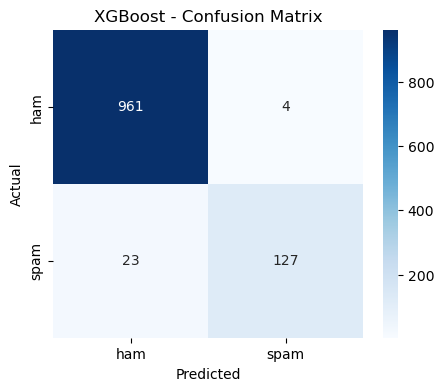

In [74]:
# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

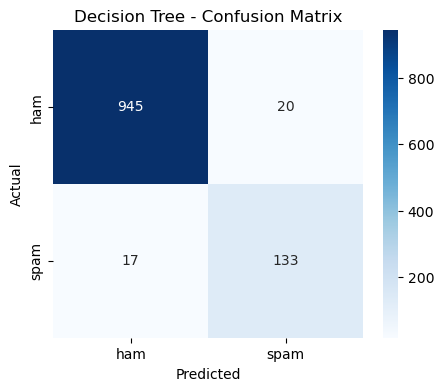

In [75]:
# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\gomaa\AppData\Local\Temp\ipykernel_18864\3112228545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette=['r', 'g'])  # استخدم palette بدلاً من color


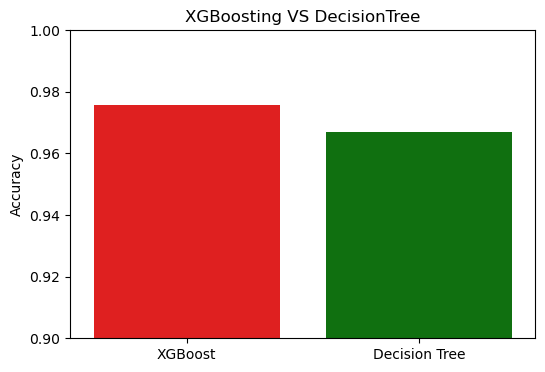

In [ ]:
# accuracy comparisons
labels = ['XGBoost', 'Decision Tree']
accuracies = [xgb_acc, dt_acc]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=accuracies, palette=['r', 'g'])  
plt.ylim(0.9, 1)
plt.title("XGBoosting VS DecisionTree")
plt.ylabel("Accuracy")
plt.show()